# Netflix Recommendation System

# Data Overview

Source - [Netflix Movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows)

TV Shows and Movies listed on Netflix
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In [1]:
import sys
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}". format(np.__version__))

import scipy as sp
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display
print("IPython version: {}". format(IPython.__version__)) 

import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

import random
import time

import warnings
warnings.filterwarnings('ignore')

Python version: 3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 22:33:48) 
[GCC 7.3.0]
pandas version: 1.0.1
matplotlib version: 3.1.3
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.12.0
scikit-learn version: 0.22.2.post1


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

# Reading Data

In [22]:
netflix=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
print(netflix.sample(10))
print('\n','-'*100,'\n')
print(netflix.shape)
print('\n','-'*100,'\n')
print(netflix.info())
print('\n','-'*100,'\n')
print(netflix.describe())
print('\n','-'*100,'\n')

       show_id     type                           title         director  \
249   70290909    Movie                     Sample This       Dan Forrer   
4559  80087347  TV Show                        Humsafar              NaN   
5865  80208052  TV Show                  Guru Aur Bhole              NaN   
1606  70045644    Movie                      Koi Aap Sa     Partho Mitra   
5950  80202146  TV Show  Luna Petunia: Return to Amazia              NaN   
2101  81010863    Movie   The Amazing Praybeyt Benjamin  Wenn V. Deramas   
433   80115464    Movie   Russell Peters: Almost Famous       Dave Higby   
2306  80198306  TV Show                          Losers              NaN   
284   70267728    Movie                           Turbo      David Soren   
4356  80208235    Movie                      Sweetheart     J.D. Dillard   

                                                   cast  \
249                                        Gene Simmons   
4559  Fawad Khan, Mahira Khan, Atiqa Odho, Na

# Data Preprocessing and Exploration

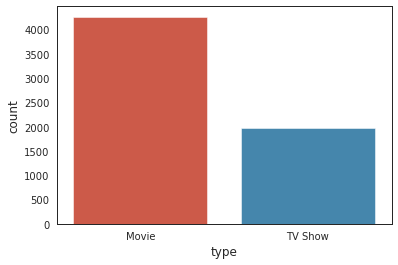

In [23]:
_ = sns.countplot(x="type", data=netflix)

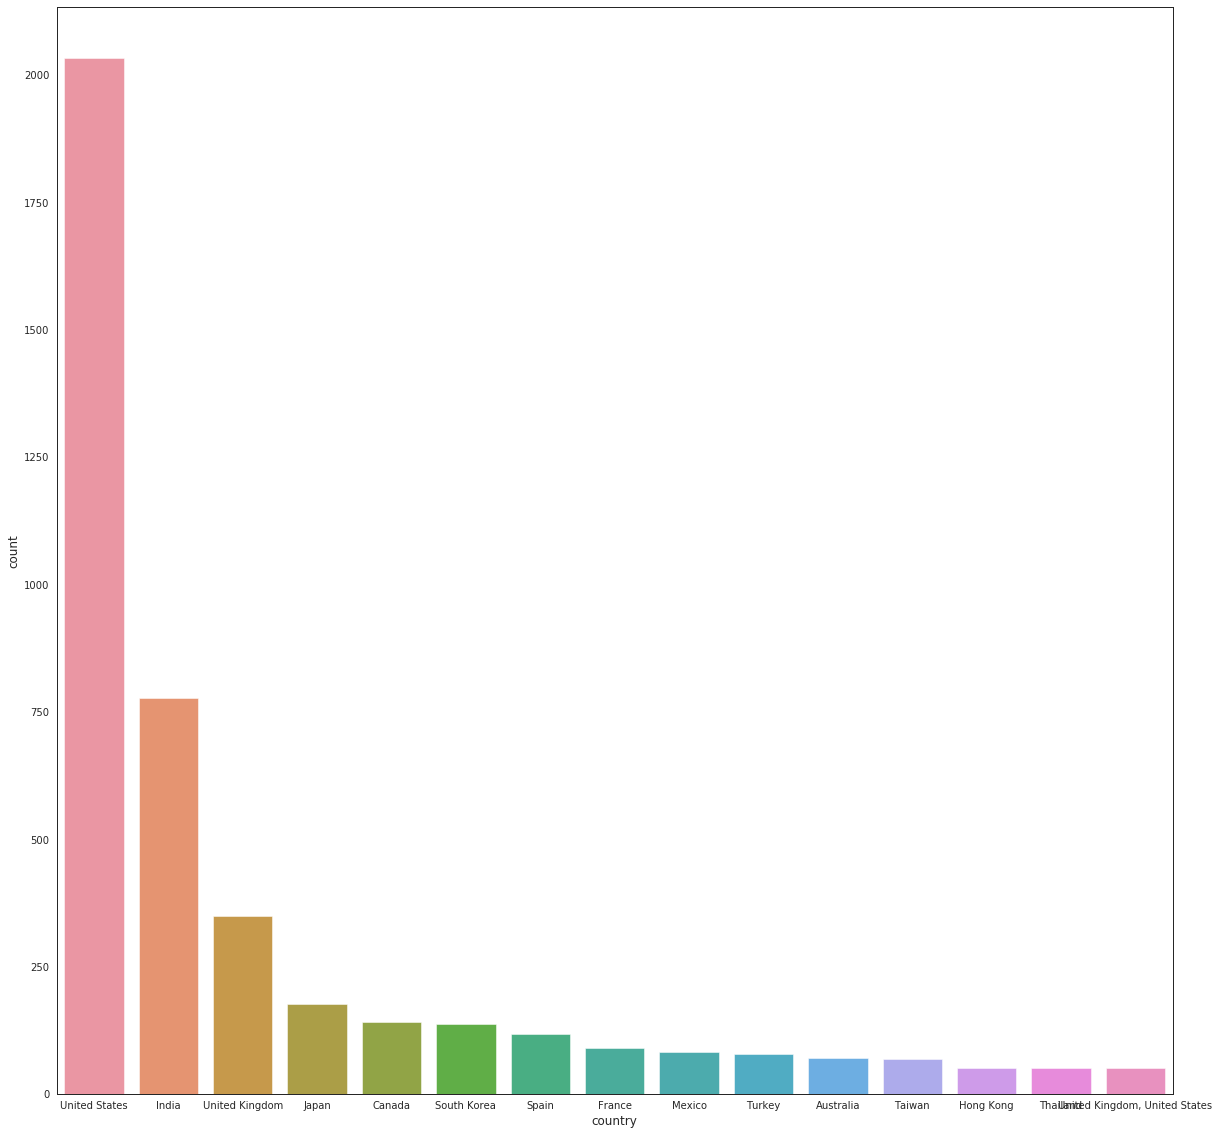

In [7]:
plt.figure(figsize=(20,20))
_ = sns.countplot(x="country", data=netflix, order=netflix['country'].value_counts().index[0:15])

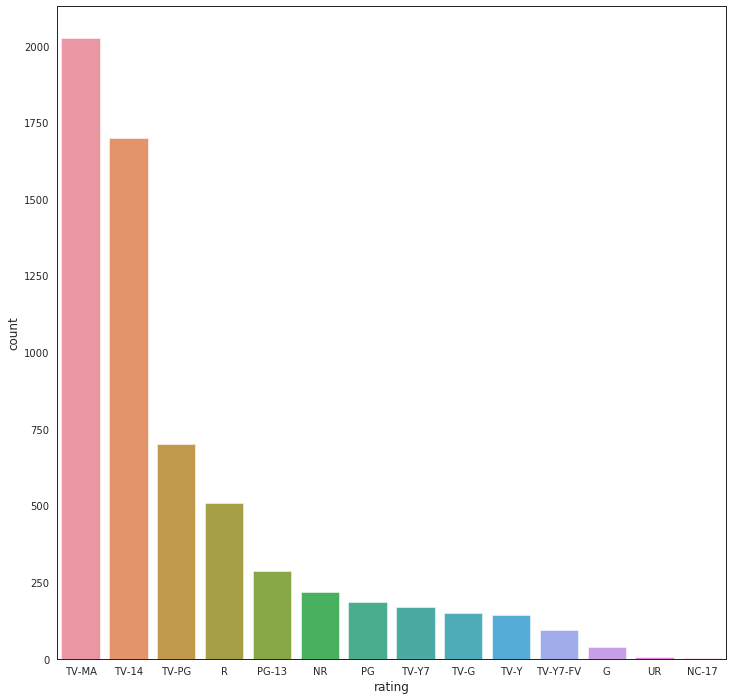

In [8]:
plt.figure(figsize=(12,12))
_ = sns.countplot(x="rating", data=netflix, order=netflix['rating'].value_counts().index[0:15])

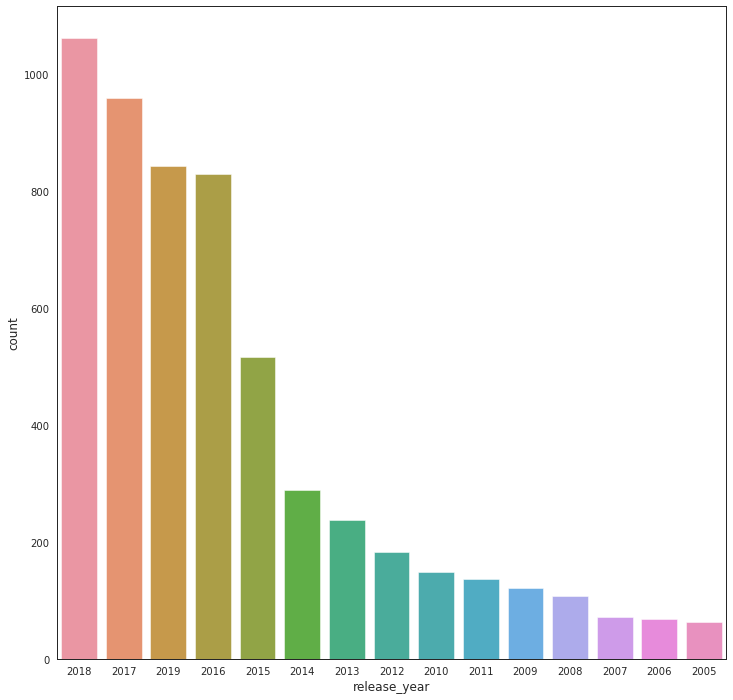

In [9]:
plt.figure(figsize=(12,12))
_ = sns.countplot(x="release_year", data=netflix, order=netflix['release_year'].value_counts().index[0:15])

# Recommendation System (Content Based)

In [10]:
filledna=netflix.fillna('')
filledna.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [11]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [12]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [13]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,listed_in,description
0,normofthenorth:kingsizedadventure,"richardfinn,timmaltby","alanmarriott,andrewtoth,briandobson,colehoward...","children&familymovies,comedies",beforeplanninganawesomeweddingforhisgrandfathe...
1,jandino:whateverittakes,,jandinoasporaat,stand-upcomedy,jandinoasporaatriffsonthechallengesofraisingki...
2,transformersprime,,"petercullen,sumaleemontano,frankwelker,jeffrey...",kids'tv,"withthehelpofthreehumanallies,theautobotsoncea..."
3,transformers:robotsindisguise,,"willfriedle,darrencriss,constancezimmer,kharyp...",kids'tv,whenaprisonshipcrashunleasheshundredsofdecepti...
4,#realityhigh,fernandolebrija,"nestacooper,katewalsh,johnmichaelhiggins,keith...",comedies,whennerdyhighschoolerdanifinallyattractstheint...


In [14]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [15]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cos_sim = cosine_similarity(count_matrix, count_matrix)

In [17]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [18]:
def Recommend(title):
    global cos_sim
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cos_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix['title'].iloc[movie_indices]

In [19]:
Recommend('PK')

5054                           3 Idiots
5494       The Legend of Michael Mishra
3093                  Anthony Kaun Hai?
2196                             Haapus
691                               Sanju
4110                   Taare Zameen Par
1449                    Chance Pe Dance
2194                    Chal Dhar Pakad
1746    EMI: Liya Hai To Chukana Padega
4920                   Khosla Ka Ghosla
Name: title, dtype: object

In [20]:
Recommend('Peaky Blinders')

3465                                   Giri / Haji
6050                   The Frankenstein Chronicles
2018                         The Murder Detectives
5529                                        Loaded
550                                      Bodyguard
2505                                 Kiss Me First
5859                                  Happy Valley
233     How to Live Mortgage Free with Sarah Beeny
522                          Terrorism Close Calls
1605                                Killer Ratings
Name: title, dtype: object